# K-Nearest-Neighbors Classifier


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

dataset = pd.read_csv("data.csv", na_values=["'NAN'"])
dataset = dataset.fillna(dataset.mean())

print(dataset.dtypes)
print(dataset.describe())

dataset.columns = ['Lamda_MAX_(micrometros)', 'Lamda_MIN_(micrometros)', 'Delta_Lamda_(rmse)', 'Radial Velocity (km s-1)', 'Delta_rv(ABSFERR)', 'Tempeartura_(Kelvin)', 'Delta_Temperatura', 'Tipo_de_Estrella', 'Archivo']

'Lamda_MAX_(micrometros)'     float64
'Lamda_MIN_(micrometros)'     float64
'Delta_Lamda_(rmse)'          float64
'Radial Velocity (km s-1)'    float64
'Delta_rv(ABSFERR)'           float64
'Tempeartura_(Kelvin)'        float64
'Delta_Temperatura'           float64
'Tipo_de_Estrella'             object
'Archivo'                      object
dtype: object
       'Lamda_MAX_(micrometros)'  'Lamda_MIN_(micrometros)'  \
count                 281.000000                 281.000000   
mean                    4.330896                   0.812946   
std                     1.002834                   0.024338   
min                     2.410840                   0.801935   
25%                     4.109770                   0.806027   
50%                     4.942140                   0.808192   
75%                     5.033480                   0.810740   
max                     5.456760                   0.935314   

       'Delta_Lamda_(rmse)'  'Radial Velocity (km s-1)'  'Delta_rv(ABSFERR)'

In [7]:
# import knn algorithm, preprocessing tool and metrics tools

from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
# Create training sets

X_train, X_test, y_train, y_test = train_test_split(
    dataset[['Lamda_MAX_(micrometros)', 'Lamda_MIN_(micrometros)', 'Delta_Lamda_(rmse)', 'Radial Velocity (km s-1)', 'Delta_rv(ABSFERR)', 'Tempeartura_(Kelvin)', 'Delta_Temperatura']],
    dataset['Tipo_de_Estrella'],
    test_size=0.4,
    random_state=42
)

In [11]:
# Create the model
clf = neighbors.KNeighborsClassifier(n_neighbors=16, weights='distance')

# Train the model using the training sets
clf.fit(X_train, y_train)

y_score = clf.fit(X_train, y_train)

# Predict Output
y_pred = clf.predict(X_test)
print(X_test)
print(y_pred)

X_test['preds'] = y_pred

     Lamda_MAX_(micrometros)  Lamda_MIN_(micrometros)  Delta_Lamda_(rmse)  \
33                   2.42274                 0.802363        1.610110e-11   
158                  4.96898                 0.809776        5.038692e-12   
249                  4.90650                 0.808303        1.640422e-11   
260                  5.42905                 0.807616        1.603585e-12   
101                  4.94273                 0.811689        4.073467e-12   
..                       ...                      ...                 ...   
69                   4.17477                 0.806522        3.709147e-12   
172                  2.41840                 0.809134        2.671430e-11   
2                    4.17790                 0.806160        2.292422e-10   
104                  4.11498                 0.811033        2.477006e-11   
76                   2.41772                 0.812066        6.218369e-12   

     Radial Velocity (km s-1)  Delta_rv(ABSFERR)  Tempeartura_(Kelvin)  \
3

['C' 'F' 'G' 'K' 'L' 'M']


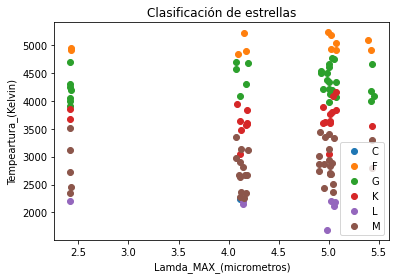

In [12]:
classes = np.unique(y_pred)
print(classes)
colors = sns.color_palette()

fig, ax = plt.subplots()

for i, c in enumerate(classes):
    data = X_test.loc[X_test['preds'] == c]
    ax.scatter(
        'Lamda_MAX_(micrometros)',
        'Tempeartura_(Kelvin)',
        data=data,
        color=colors[i],
        label=c
    )

ax.set_title("Clasificación de estrellas")
ax.set_xlabel('Lamda_MAX_(micrometros)')
ax.set_ylabel('Tempeartura_(Kelvin)')
ax.legend()

plt.show()

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[ 0  0  0  1  1  1  0  0]
 [ 0 11  6  0  0  0  0  0]
 [ 0  1 19  6  0  0  0  0]
 [ 0  0  7 12  0  9  0  0]
 [ 0  0  0  0  3  2  0  0]
 [ 0  0  0  3  3 26  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]]


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("Precision:", metrics.precision_score(y_test, y_pred, average='micro'))

Accuracy: 0.6283185840707964
Recall: 0.6283185840707964
Precision: 0.6283185840707964
